In [138]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import trange

import actor_critic
import importlib
importlib.reload(actor_critic)
from actor_critic import ActorCritic, EnvBatch

In [139]:
environ_name = "CartPole-v0"
env = EnvBatch( lambda : gym.make(environ_name), n_envs=10 )

lin_feature_func = lambda x : np.hstack( [ np.ones( (x.shape[0],1) ), x ] )

actor = actor_critic.ActorLinear(feature_func=lin_feature_func, env=env,
                      scale_model_inputs=True, activation='elu')
critic = actor_critic.CriticLinear(feature_func=lin_feature_func, env=env,
                      scale_model_inputs=True, activation='elu')

/Users/chris/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1503: RuntimeWarning: overflow encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/chris/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1508: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/chris/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1503: RuntimeWarning: overflow encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/chris/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1508: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [134]:
ac = ActorCritic(
                 env=env,
                 entropy_coef=0.01,
                 actor_learning_rate=0.001,
                 critic_learning_rate=0.001
                )

/Users/chris/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1503: RuntimeWarning: overflow encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/chris/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1508: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/chris/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1503: RuntimeWarning: overflow encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/chris/anaconda3/envs/python37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1508: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


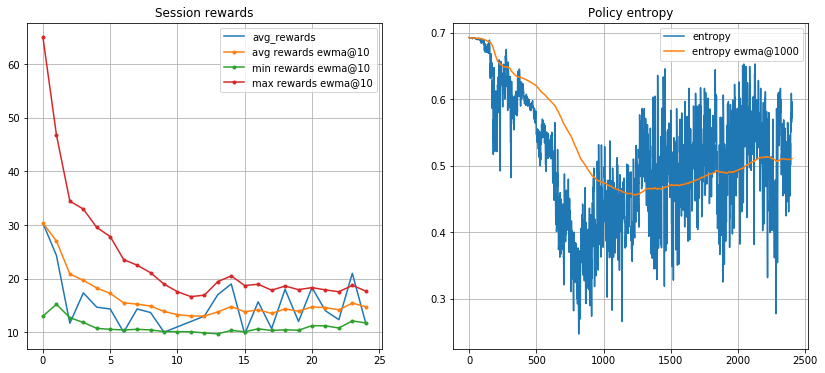







 24%|██▍       | 2403/10001 [01:11<07:59, 15.85it/s]





 24%|██▍       | 2407/10001 [01:11<06:36, 19.16it/s]





 24%|██▍       | 2412/10001 [01:11<05:30, 22.98it/s]





 24%|██▍       | 2417/10001 [01:11<04:43, 26.73it/s]





 24%|██▍       | 2422/10001 [01:11<04:12, 30.02it/s]





 24%|██▍       | 2427/10001 [01:11<03:48, 33.08it/s]





 24%|██▍       | 2432/10001 [01:11<03:36, 34.89it/s]





 24%|██▍       | 2437/10001 [01:12<03:24, 36.94it/s]





 24%|██▍       | 2442/10001 [01:12<03:16, 38.55it/s]





 24%|██▍       | 2447/10001 [01:12<03:09, 39.81it/s]





 25%|██▍       | 2452/10001 [01:12<03:03, 41.08it/s]





 25%|██▍       | 2457/10001 [01:12<03:02, 41.38it/s]





 25%|██▍       | 2462/10001 [01:12<03:01, 41.48it/s]





 25%|██▍       | 2467/10001 [01:12<03:00, 41.72it/s]

KeyboardInterrupt: 

In [135]:
ac.run(n_iters=10001, gamma=0.99)

In [125]:
feature_func = lambda x : np.hstack( [ np.ones( (x.shape[0],1) ), x ] )

In [127]:
feature_func = lambda x : np.hstack( [ np.ones( (x.shape[0],1) ), x ] )
samples = np.array( [ env.observation_space.sample() for _ in range(3) ] )
feature_func( np.array([ env.observation_space.sample() for _ in range(3) ]) )

array([[ 1.00000000e+00,  4.12733984e+00,  3.32599674e+37,
        -3.71571153e-01,  6.35184576e+37],
       [ 1.00000000e+00,  3.13688278e+00,  1.38234955e+38,
        -2.57473379e-01,  1.39256175e+38],
       [ 1.00000000e+00,  6.72430336e-01,  1.66820679e+38,
        -2.99756497e-01, -2.55897848e+38]])

In [ ]:
E = [env]
A = tf.convert_to_tensor(np.array( [1]))
[ env.step(a) for env, a in zip( E, A ) ]

In [ ]:
gamma = 0.99
n_episodes = 10000

# Get the initial states
batch_states = ac.env.reset()
rewards_mean, rewards_max, rewards_min = [], [], []
entropy_history = []        
curr_scores = np.zeros((len(batch_states),))
scores = []

for i in range(n_episodes):
    batch_actions = ac.choose_action_from_state(batch_states)
    batch_next_states, batch_rewards, batch_done, _ = ac.env.step(batch_actions)

    # Increment the scores, and reward scores for games that have finished
    curr_scores += batch_rewards
    scores.extend(curr_scores[batch_done])
    curr_scores[batch_done] = 0

    # Train the neural network from the states, rewards and transitions
    actor_loss, critic_loss, ent_t = ac.train_step( batch_states, batch_next_states, \
                                  batch_actions, batch_rewards, batch_done, gamma=gamma )
    batch_states = batch_next_states
    entropy_history.append(np.mean(ent_t))

    if np.any(batch_done):
        print( '{}: Finished with score of: {}'.format(i, scores[-1] ) )
        clear_output(True)
        plt.figure(figsize=[14, 6])
        plt.grid()
        plt.plot(scores)
        plt.show()

In [ ]:
import gym
dt = list(gym.envs.registry.all())
kenv = gym.make( 'KellyCoinflip-v0')

In [ ]:
kenv.observation_space[0].low[0]

In [ ]:
gym.envs.classic_control

In [ ]:
np.hstack( [ [0], np.array(3) ])

In [ ]:
from collections import namedtuple
Observation = namedtuple( 'Observation', [ 'portfolio_value', 'weight', 'mu', 'cholesky' ])

In [ ]:
np.tril_indices_from?

In [ ]:
import tensorflow_probability as tfp

In [ ]:
R = np.random.randn(1000,2) 
R = R - R.mean(axis=1, keepdims=True)

In [ ]:
plt.scatter( 0.3 + 0.2 * R[:,0], 0.7 + 0.2 * R[:,1])
plt.xlim( [0,1])
plt.ylim([0, 1] )

In [ ]:
plt.hist(0.9 + 0.2 * R[:,1])

In [ ]:
np.random.dirichlet( np.ones((4,)) )

In [ ]:
rangen = np.random.RandomState()